# Plotting candlestick charts

### Key parameters for displaying candlestick charts:
- an array of stock codes
- n days to display

### Import libaries and data files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import yfinance as yf
from datetime import date, timedelta
from math import ceil

In [2]:
import sys
sys.path.insert(0, '../common')
from myfunctions import *

In [3]:
root = "../"

In [4]:
file_adj = root + "data/adj.csv"
df_adj = pd.read_csv(file_adj, index_col=0, header=0)
df_adj = remove_null_rows(df_adj)
df_adj = remove_repeated_row(df_adj)

In [5]:
file_high = root + "data/high.csv"
df_high = pd.read_csv(file_high, index_col=0, header=0)
df_high = remove_null_rows(df_high)
df_high = remove_repeated_row(df_high)

In [6]:
file_low = root + "data/low.csv"
df_low = pd.read_csv(file_low, index_col=0, header=0)
df_low = remove_null_rows(df_low)
df_low = remove_repeated_row(df_low)

In [7]:
file_volume = root + "data/volume.csv"
df_volume = pd.read_csv(file_volume, index_col=0, header=0)
df_volume = remove_null_rows(df_volume)
df_volume = remove_repeated_row(df_volume)

In [8]:
file_open = root + "data/open.csv"
df_open = pd.read_csv(file_open, index_col=0, header=0)
df_open = remove_null_rows(df_open)
df_open = remove_repeated_row(df_open)

In [9]:
file_close = root + "data/close.csv"
df_close = pd.read_csv(file_close, index_col=0, header=0)
df_close = remove_null_rows(df_close)
df_close = remove_repeated_row(df_close)

# Load an array of stocks

In [10]:
#codes = ["2333.HK", "0460.HK", "3690.HK", "0700.HK", "0941.HK", "0857.HK"]
#codes = ["2333.HK", "0460.HK"]

In [50]:
codes_all = ["0992.HK", "0669.HK", "0460.HK", "0293.HK", "1055.HK", "1691.HK", "0867.HK", "0598.HK", "1816.HK", "0038.HK", "1929.HK", "0696.HK", "0220.HK"]

In [69]:
codes = codes_all

In [70]:
df_names = pd.DataFrame(data=codes, index=codes)
df_names = merge_stock_names(df_names)

In [71]:
df_names.loc[codes[0], "name"]

'聯想集團'

In [72]:
def single_stock_data(code):
    df = pd.DataFrame(df_adj.loc[:,code])
    df.rename(columns={code:"adj"}, inplace=True)
    df["open"] = df_open.loc[:,code]
    df["close"] = df_close.loc[:,code]
    df["high"] = df_high.loc[:,code]
    df["low"] = df_low.loc[:,code]
    df["volume"] = df_volume.loc[:,code]
    return df

In [73]:
def add_range_MA(df):
    # delta is the changes in close price today vs one day prior
    df['delta'] = df['close'] - df['close'].shift(1)

    df['open_close_diff'] = (df['close'] - df['open']).apply(np.absolute)

    df['open_close_min'] = df[['open', 'close']].apply(np.min, axis=1)
    df['open_close_max'] = df[['open', 'close']].apply(np.max, axis=1)

    df['range_up'] = df['high'] - df['open_close_max']
    df['range_down'] = df['open_close_min'] - df['low']
    
    df['5MA'] = df['close'].rolling(5).mean().round(2)
    df['10MA'] = df['close'].rolling(10).mean().round(2)
    df['20MA'] = df['close'].rolling(20).mean().round(2)
    df['50MA'] = df['close'].rolling(50).mean().round(2)
    df['100MA'] = df['close'].rolling(100).mean().round(2)
    df['200MA'] = df['close'].rolling(200).mean().round(2)
    
    return df

In [74]:
n = len(codes)
n

13

In [75]:
# colors
color_face = "#000047"

# color_10 = "#c82083"
# color_20 = "#f3ed1b"
# color_50 = "#b4b8e7"
# color_100 = "#9e7920"

color_5 = "pink"
color_10 = "red"
color_20 = "yellow"
color_50 = "#b4b8e7"
color_100 = "#9e7920"
color_200 = "white"

color_up = "#1ed4ff"
color_down = "#6af80f"
color_grid = "#aabbcc"

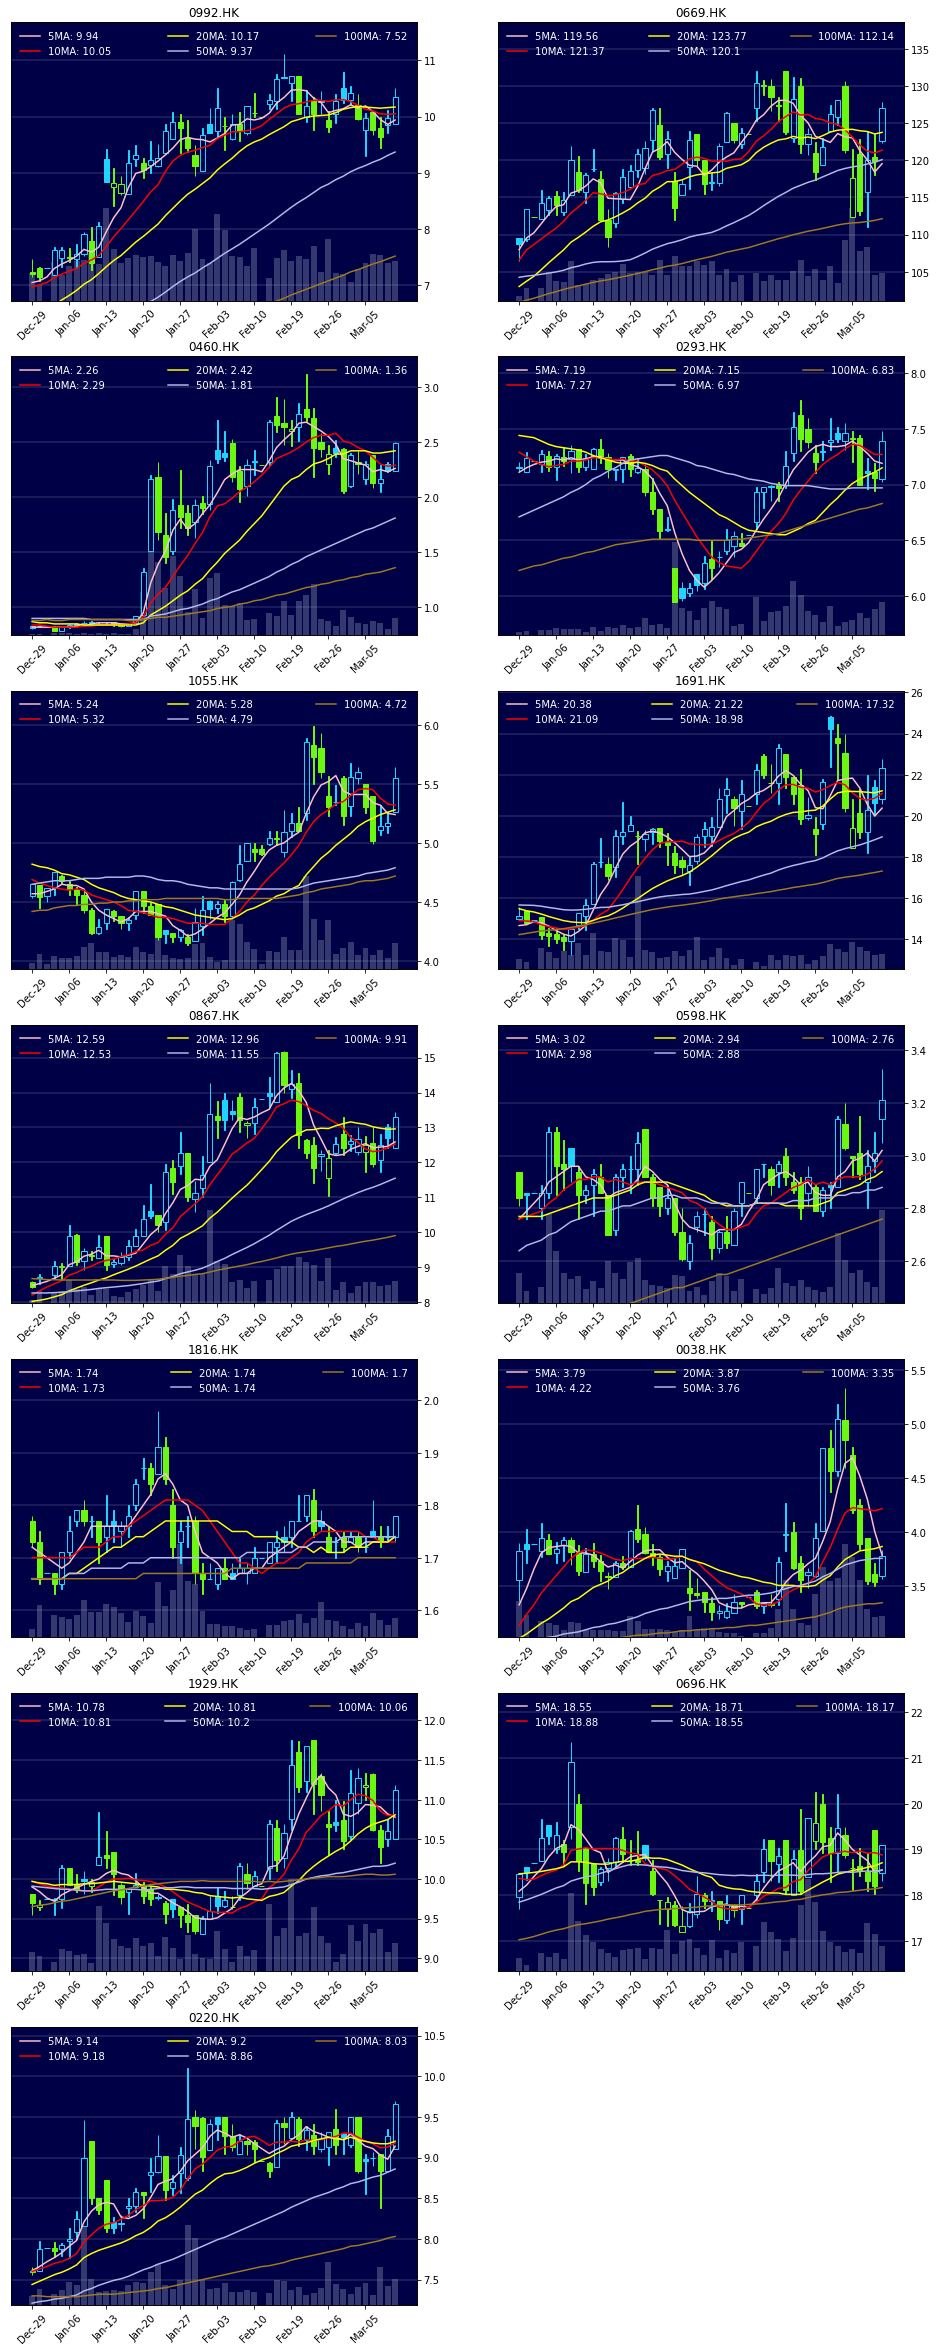

In [76]:
fig = plt.figure(figsize=(16,6*ceil(n/2)))

for j in np.arange(len(codes)):
    #print("j="+ str(j))
    code = codes[j]
    df = single_stock_data(code)
    df = add_range_MA(df)

    # day range to show
    n_days=50
    df = df[-n_days:]

    ax1 = fig.add_subplot(ceil(n/2),2,(j+1))
    ax1.set_title(code)
    ax1.set_facecolor(color_face)

    # axis tickers
    months = [pd.to_datetime(df.index.values[i]).strftime("%b") for i in np.arange(0,len(df.index.values))]
    days = [pd.to_datetime(df.index.values[i]).strftime("%d") for i in np.arange(0,len(df.index.values))]
    labels = [months[i] + "-" + days[i] for i in np.arange(0,len(months))]
    x_pos = np.arange(len(labels))

    # To align labels with selection - list with skipping/steps
    max_label_no = 10;
    label_step = int(len(labels)/10)
    labels2 = labels[0:len(labels):label_step]
    
    plt.xticks(x_pos, labels2, rotation="45")
    loc = plticker.FixedLocator(np.arange(0,len(labels),label_step))
    ax1.xaxis.set_major_locator(loc)


    ax1.yaxis.set_visible(False)
    ax1.bar(x_pos, (df["volume"]/1000000), color=color_grid, alpha=0.3)
    y1_max = (df["volume"]/1000000).max()*3
    y1_min = 0
    ax1.set_ylim(y1_min,y1_max)
    
    ax2 = ax1.twinx()
    ax2.plot(x_pos, df['5MA'], color_5, label='5MA: '+str(df['5MA'][-1]))    
    ax2.plot(x_pos, df['10MA'], color_10, label='10MA: '+str(df['10MA'][-1]))
    ax2.plot(x_pos, df['20MA'], color_20, label='20MA: '+str(df['20MA'][-1]))
    ax2.plot(x_pos, df['50MA'], color_50, label='50MA: '+str(df['50MA'][-1]))
    ax2.plot(x_pos, df['100MA'], color_100, label='100MA: '+str(df['100MA'][-1]))

    leg = ax2.legend(framealpha=0, loc='upper left', frameon=False, mode="expand", ncol=3)
    for text in leg.get_texts():
        plt.setp(text, color = 'w')

    edgecolors = [color_down if df["delta"][i] < 0 else color_up for i in np.arange(0,len(df["close"]))]  
    colors = [color_face if (df["open"][i] - df["close"][i] < 0) else edgecolors[i] for i in np.arange(0,len(df["close"]))]
    
    # bars in the middle
    ax2.bar(x_pos, df['open_close_diff'], bottom=df['open_close_min'] , width=0.7, color=colors, edgecolor=edgecolors)
    
    # sticks up and down
    ax2.bar(x_pos, df['range_up'], bottom=df['open_close_max'] , width=0.1, color=colors, edgecolor=edgecolors)
    ax2.bar(x_pos, df['range_down'], bottom=df['low'] , width=0.1, color=colors, edgecolor=edgecolors)
    
    y2_max = df["high"].max()*1.05
    y2_min = df["low"].min()*0.95
    ax2.set_ylim(y2_min,y2_max)
    
    ax2.grid(color=color_grid, linestyle="-", linewidth=0.3)
    

plt.show()